In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        if filename.startswith('bike'):
            print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/av-ms-ds/bike-sharing-Readme.txt
/kaggle/input/av-ms-ds/bike-sharing-day.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import numpy as np
import pandas as pd

In [4]:
# loading the dataset to the pandas dataframe
bike_df = pd.DataFrame(pd.read_csv("/kaggle/input/av-ms-ds/bike-sharing-day.csv"))
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
bike_df.shape

(730, 16)

In [6]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# High-level observations from the dataframe

* Dataset has 16 columns and 730 rows.

* Except one column (dteday: object), all other are either float(float64) or integer(int64) type.

* dteday column is object type, but it has to be of date data type.

* At the highlevel, there seems to be some fields that are categorical in nature, but in integer/float type.
 
* We will analyse and finalize whether to convert them to categorical(discrete) or treat as integer(continuous)

## Inspect Null or Missing values

In [8]:
# percentage of missing values in each column
round(100*(bike_df.isnull().sum()/len(bike_df)), 2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [9]:
# percentage of null values in each column
round((bike_df.isnull().sum(axis=1)/len(bike_df))*100,2).sort_values(ascending=False)

729    0.0
0      0.0
1      0.0
2      0.0
3      0.0
      ... 
29     0.0
30     0.0
31     0.0
32     0.0
33     0.0
Length: 730, dtype: float64

There are no missing / Null values either in columns or rows

### Checking for duplicates and dropping the entire duplicate row if any

In [10]:
bike_df_copy = bike_df.copy()
#removing duplicates from the copied df
bike_df_copy.drop_duplicates(subset=None, inplace=True)

In [11]:
bike_df_copy.shape

(730, 16)

In [12]:
bike_df.shape

(730, 16)

There is no reduction in rows in copied df since there is no duplicates found.

So we can conclude that there were zero duplicate values in the bike dataset.

Data Cleaning

Let us check for `value_counts()` for entire dataframe to identify any Unknown/Junk values present in the dataset.

In [13]:
bike_temp=bike_df.iloc[:,1:16]

In [14]:
bike_temp.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [15]:
# util function to extract value counts for all the columns in a df
def extract_value_counts(df):
    for col in df:
        print("column name: ", col)
        print('+'*50,'\n\n\n',df[col].value_counts(ascending=False), '\n\n\n')

In [16]:
extract_value_counts(bike_df)

column name:  instant
++++++++++++++++++++++++++++++++++++++++++++++++++ 


 instant
730    1
1      1
2      1
3      1
4      1
      ..
30     1
31     1
32     1
33     1
34     1
Name: count, Length: 730, dtype: int64 



column name:  dteday
++++++++++++++++++++++++++++++++++++++++++++++++++ 


 dteday
31-12-2019    1
01-01-2018    1
02-01-2018    1
03-01-2018    1
04-01-2018    1
             ..
30-01-2018    1
31-01-2018    1
01-02-2018    1
02-02-2018    1
03-02-2018    1
Name: count, Length: 730, dtype: int64 



column name:  season
++++++++++++++++++++++++++++++++++++++++++++++++++ 


 season
3    188
2    184
1    180
4    178
Name: count, dtype: int64 



column name:  yr
++++++++++++++++++++++++++++++++++++++++++++++++++ 


 yr
0    365
1    365
Name: count, dtype: int64 



column name:  mnth
++++++++++++++++++++++++++++++++++++++++++++++++++ 


 mnth
1     62
3     62
7     62
5     62
12    62
10    62
8     62
4     60
9     60
6     60
11    60
2     56
Name: count,

After observing the above data we could conclude there is no null or unknown values in the dataframe.


### Removing redundant & unwanted columns

Based on a high-level review of the data and the data dictionary, the following variables can be removed from further analysis:

| Variable | Reason for Removal |
|---|---|
| **`instant`** | 📅 **Index Value**: It's merely an index and does not provide useful information for analysis. |
| **`dteday`** | 📆 **Date Column**: We already have separate columns for 'year' and 'month', so this column is redundant. |
| **`casual`** & **`registered`** | 🚴‍♂️ **Customer Counts**: These columns contain the count of bikes booked by different customer categories. Our objective is to find the total count of bikes, not by specific category. Additionally, we have created a new variable to represent the ratio of these customer types. |

We will save the new dataframe as `bike_refined_df` to preserve the original dataset for any future analysis or validation.



In [17]:
#Lets delete all the columns which value is unique in nature by verifiying as shown below.

unique_columns = [col for col in bike_df.columns if bike_df[col].nunique() == len(bike_df)]
unique_columns

['instant', 'dteday']

In [18]:
bike_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [19]:
bike_df.drop(['instant','dteday'], axis=1, inplace=True)

## Dropping casual and Registed as  they sumed to Cnt.

In [20]:
bike_df.drop(['casual','registered'], axis=1, inplace=True)

In [21]:
bike_df.shape

(730, 12)

In [22]:
bike_refined_df = bike_df[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]

In [23]:
bike_refined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


## Perform the EDA on (bike_refined_df) Dataset.

#### util function to create barplot related to categorical columns

In [24]:
# Function to create bar plots for categorical columns
def plot_bar_graphs(df, column):
    """
    Plots bar graphs for a given categorical column in the dataframe.
    
    Args:
    df (pd.DataFrame): The input dataframe.
    column (str): The categorical column to plot.
    
    Returns:
    None
    """
    # Set the style of the plots
    sns.set(style="whitegrid")
    
    # Create a figure with a specified size
    plt.figure(figsize=(14, 7))
    
    # First subplot: Bar plot of column vs cnt
    plt.subplot(1, 2, 1)
    sns.barplot(x=column, y='cnt', data=df, palette='viridis')
    plt.title(f'Bar Plot of {column} vs cnt', fontsize=14, color='blue')
    plt.xlabel(column, fontsize=12, color='darkgreen')
    plt.ylabel('Count', fontsize=12, color='darkgreen')
    
    # Second subplot: Bar plot of column vs cnt with hue based on 'yr'
    plt.subplot(1, 2, 2)
    sns.barplot(x=column, y='cnt', data=df, hue='yr', palette='Set1')
    plt.title(f'Bar Plot of {column} vs cnt (2018 vs 2019)', fontsize=14, color='blue')
    plt.xlabel(column, fontsize=12, color='darkgreen')
    plt.ylabel('Count', fontsize=12, color='darkgreen')
    plt.legend(title='Year', labels=['2018', '2019'], fontsize=10, title_fontsize=12)
    
    # Adjust layout for better spacing between plots
    plt.tight_layout()
    
    # Display the plots
    plt.show()

## Outliers check

#### Lets check if any outliers present in the numeric features using raw box plots for independant variables with continuous values

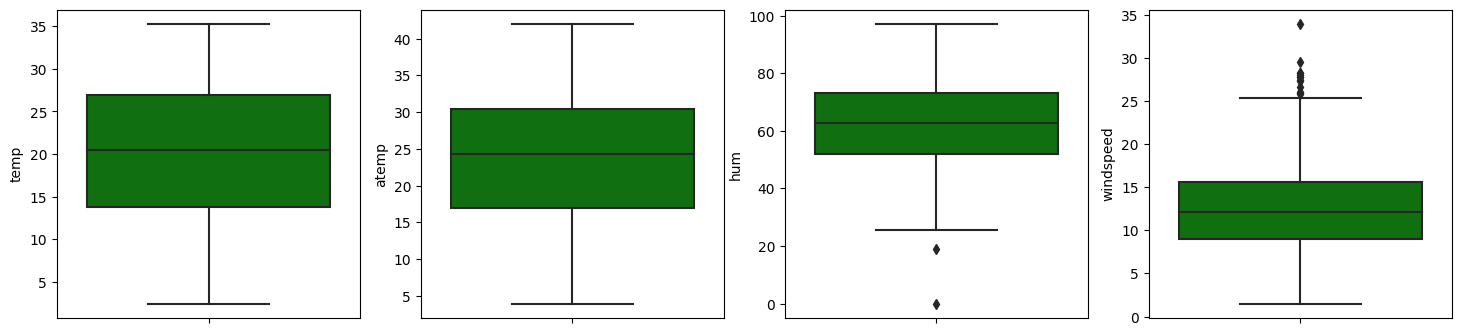

In [25]:
# Lets check if any outliers present in the numeric features using raw box plots for independant variables with continuous values
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

k = 1
for col in cols:
    plt.subplot(1,4,k)
    sns.boxplot(y=col, data=bike_refined_df, color='green')
    k+=1

#### Line graph will that show the count vs month for year 2018 and 2019.

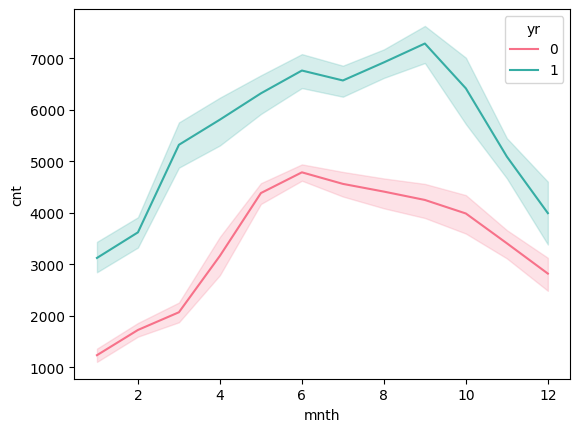

In [26]:
# Line graph will that show the count vs month for year 2018 and 2019.
sns.lineplot(x = "mnth", y = "cnt", data=bike_refined_df,hue='yr', markers=True, palette='husl')
plt.show() 

Inferences:
1. From Boxchart we can also see that there is no outliers present.
2. Demand for bike is high between may to oct for year 2018 and 2019.
3. From Line Graph we can see that target Variable cnt has increased from 2018 to 2019.

#### Lets use pairplots to have better to see if `cnt` is linearly  depend upon is independant variables. 

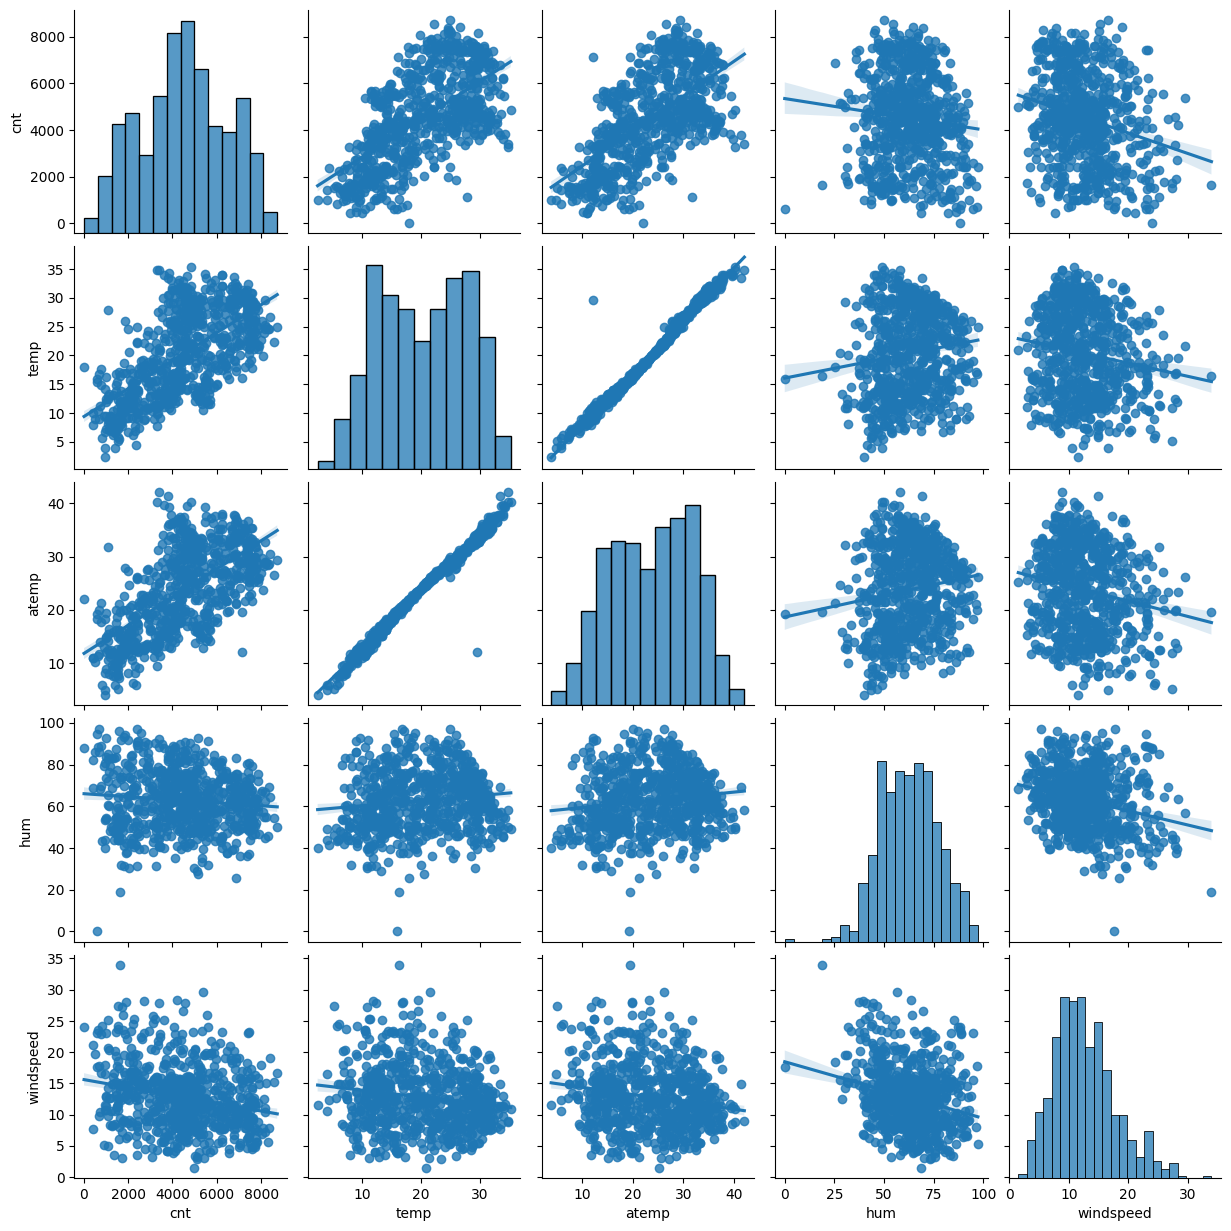

In [27]:
# Lets plot pairplots to have better to see if cnt is linearly  depend upon is independant variables. 
num_vars=['cnt', 'temp', 'atemp', 'hum','windspeed']
sns.pairplot(data=bike_refined_df,vars=num_vars, kind="reg")
plt.show()

Inferences:
1. We can see that we have linearly dependency between temp, atemp and count.
2. we can also see that temp and atemp is highly correlated.

#  Barcharts with categorical variables to see demands

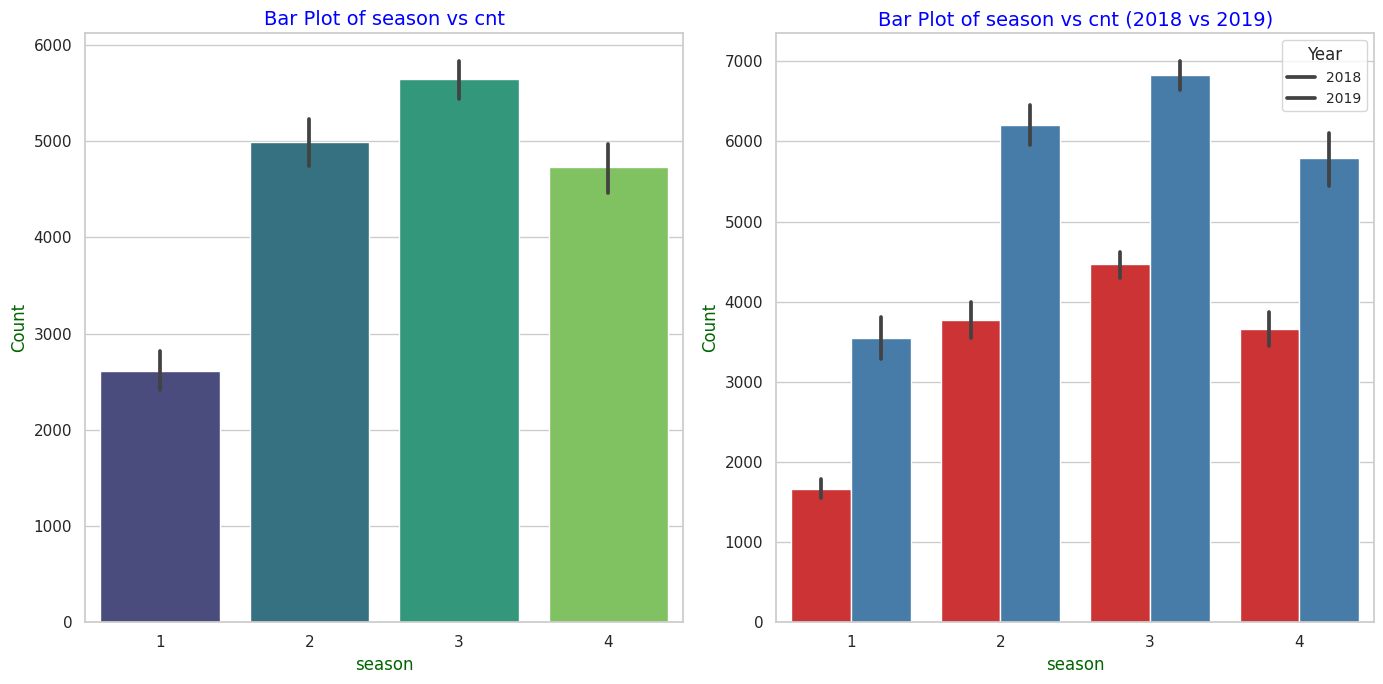

In [28]:
plot_bar_graphs(bike_refined_df,'season')

Inferences:
1. Fall  seasons is having high number bike rental.
2. Bike rental in 2019 has increaded for every seasion compared to 2018.

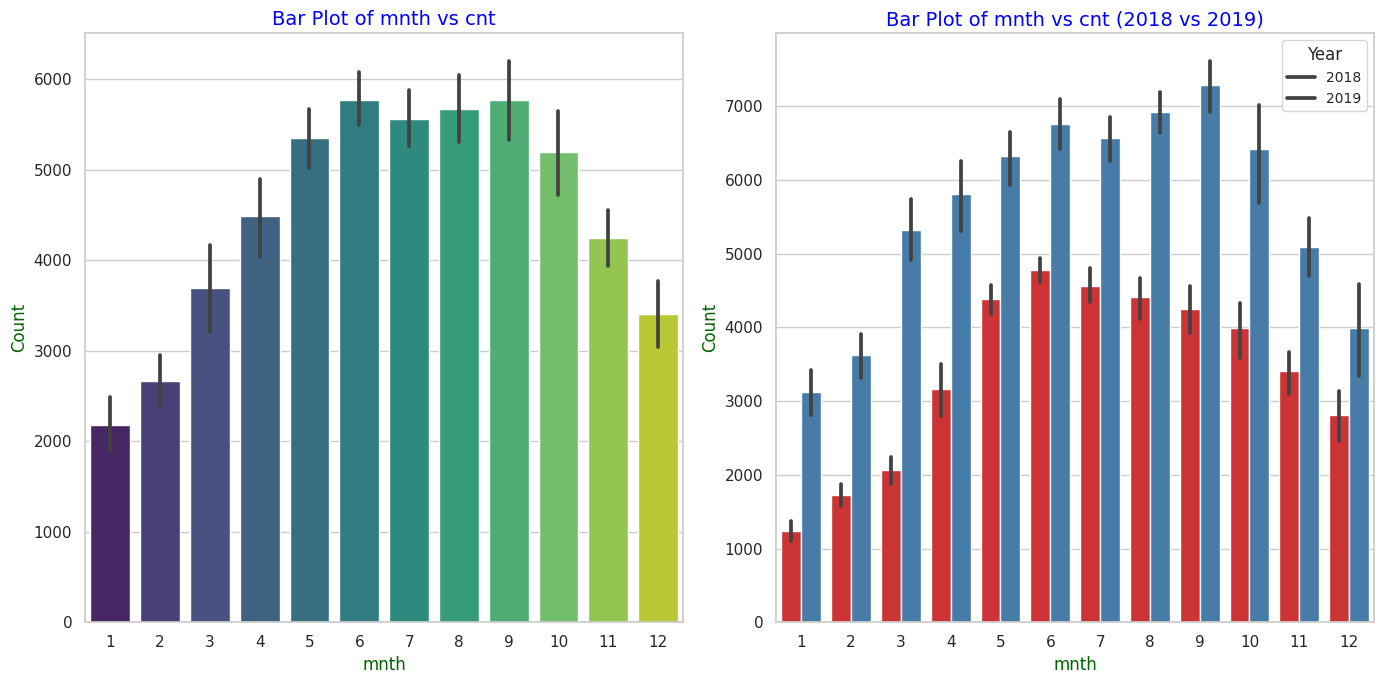

In [29]:
plot_bar_graphs(bike_refined_df,'mnth')

Inferences:
1. May to oct is having number of bike registration.
2. Bike registration in 2019 has increaded for every month compared to 2018.

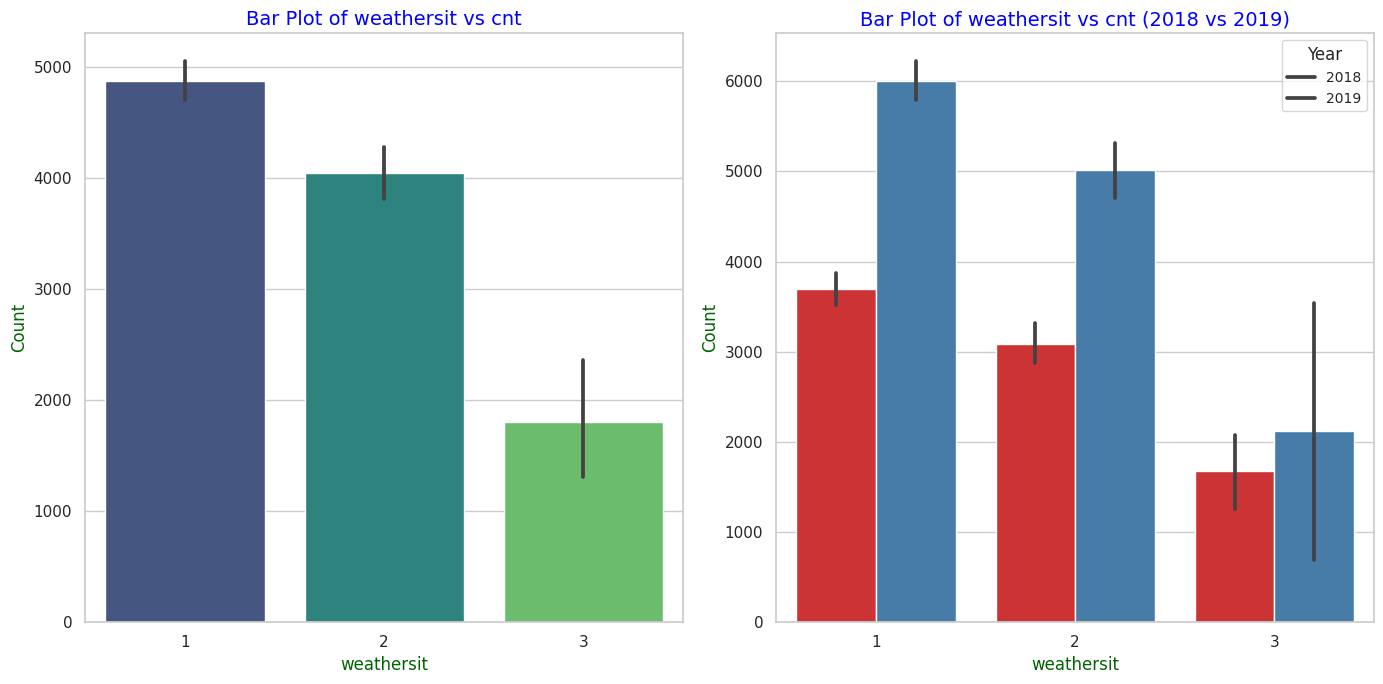

In [30]:
plot_bar_graphs(bike_refined_df,'weathersit')

Inferences:
1. People prefer bike rental when weather situations is good. 
2. Bike registration in 2019 has increaded  for every weather situtation 2018.

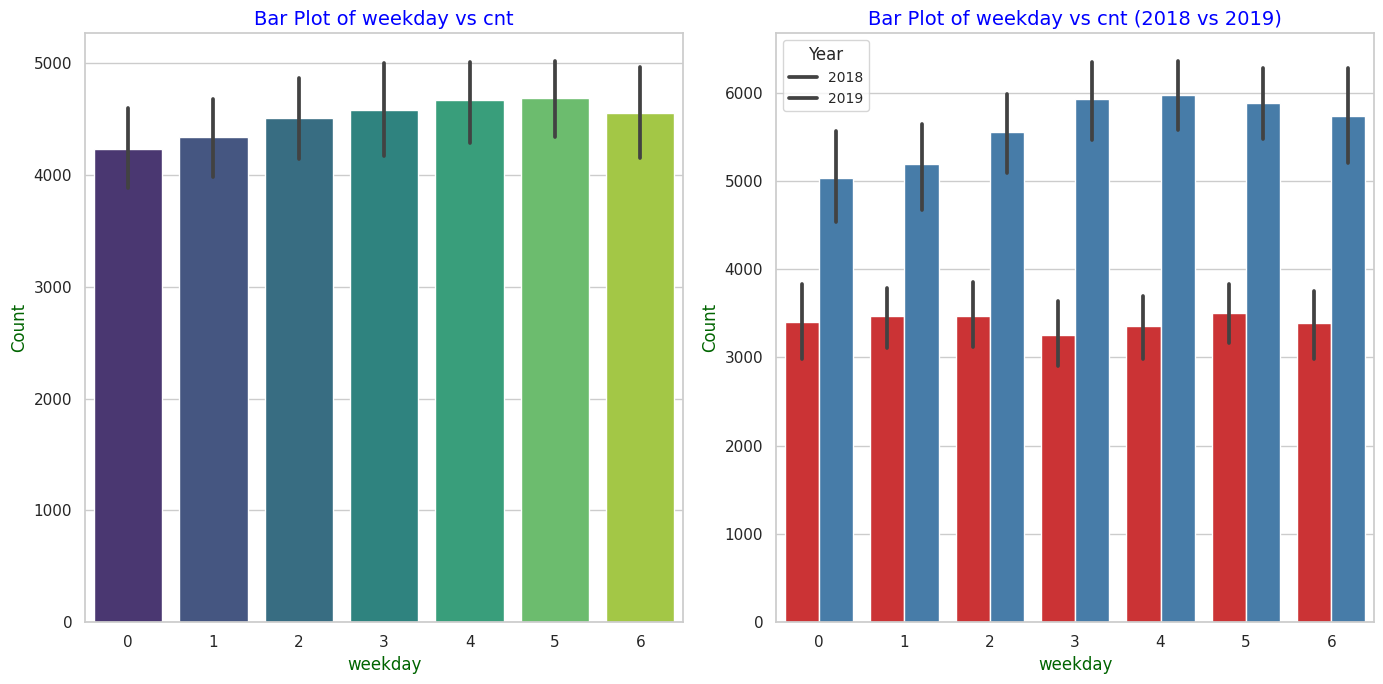

In [31]:
plot_bar_graphs(bike_refined_df,'weekday')

Inferences:
1. People don't prefer bike rental on weekends. 

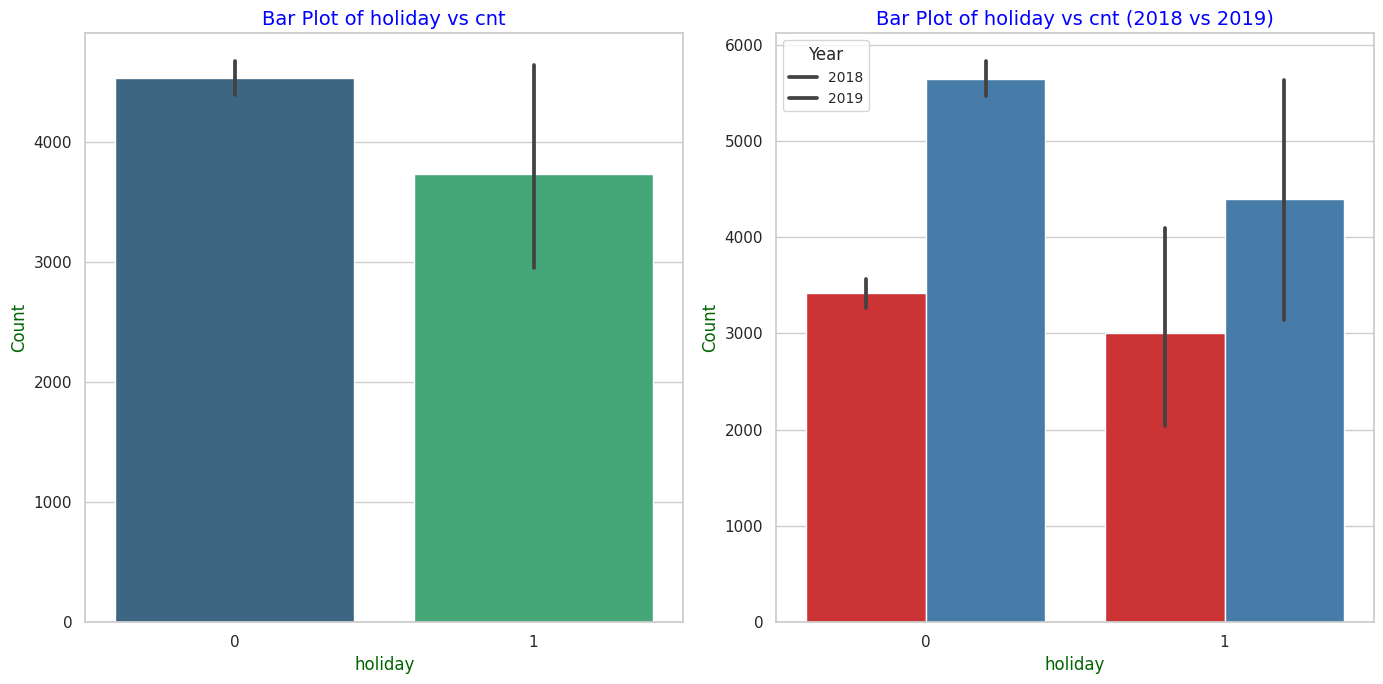

In [32]:
plot_bar_graphs(bike_refined_df,'holiday')

Inferences:
1. People don't prefer renting bike holiday.

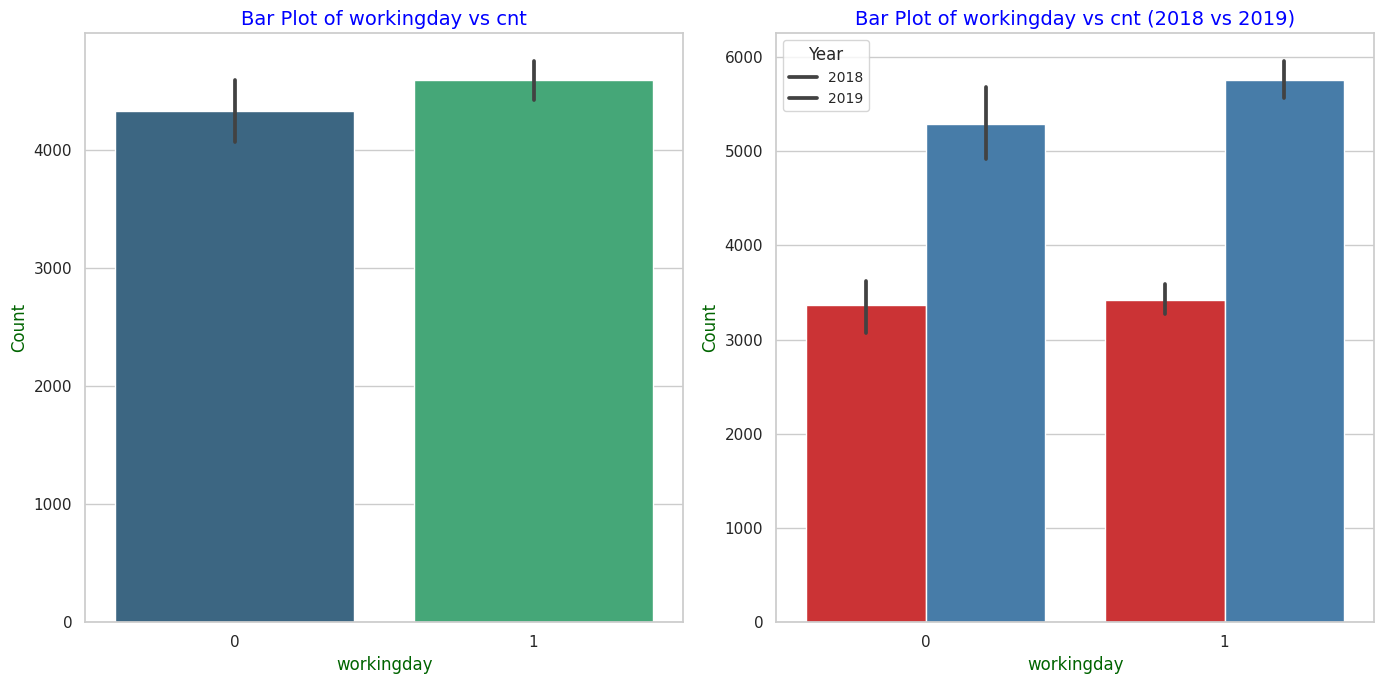

In [33]:
plot_bar_graphs(bike_refined_df,'workingday')

Inferences:
1. People prefer bike rental on working days.

### Correlation Study

Lets draw heatMap to indentify is there any correlation between various features.

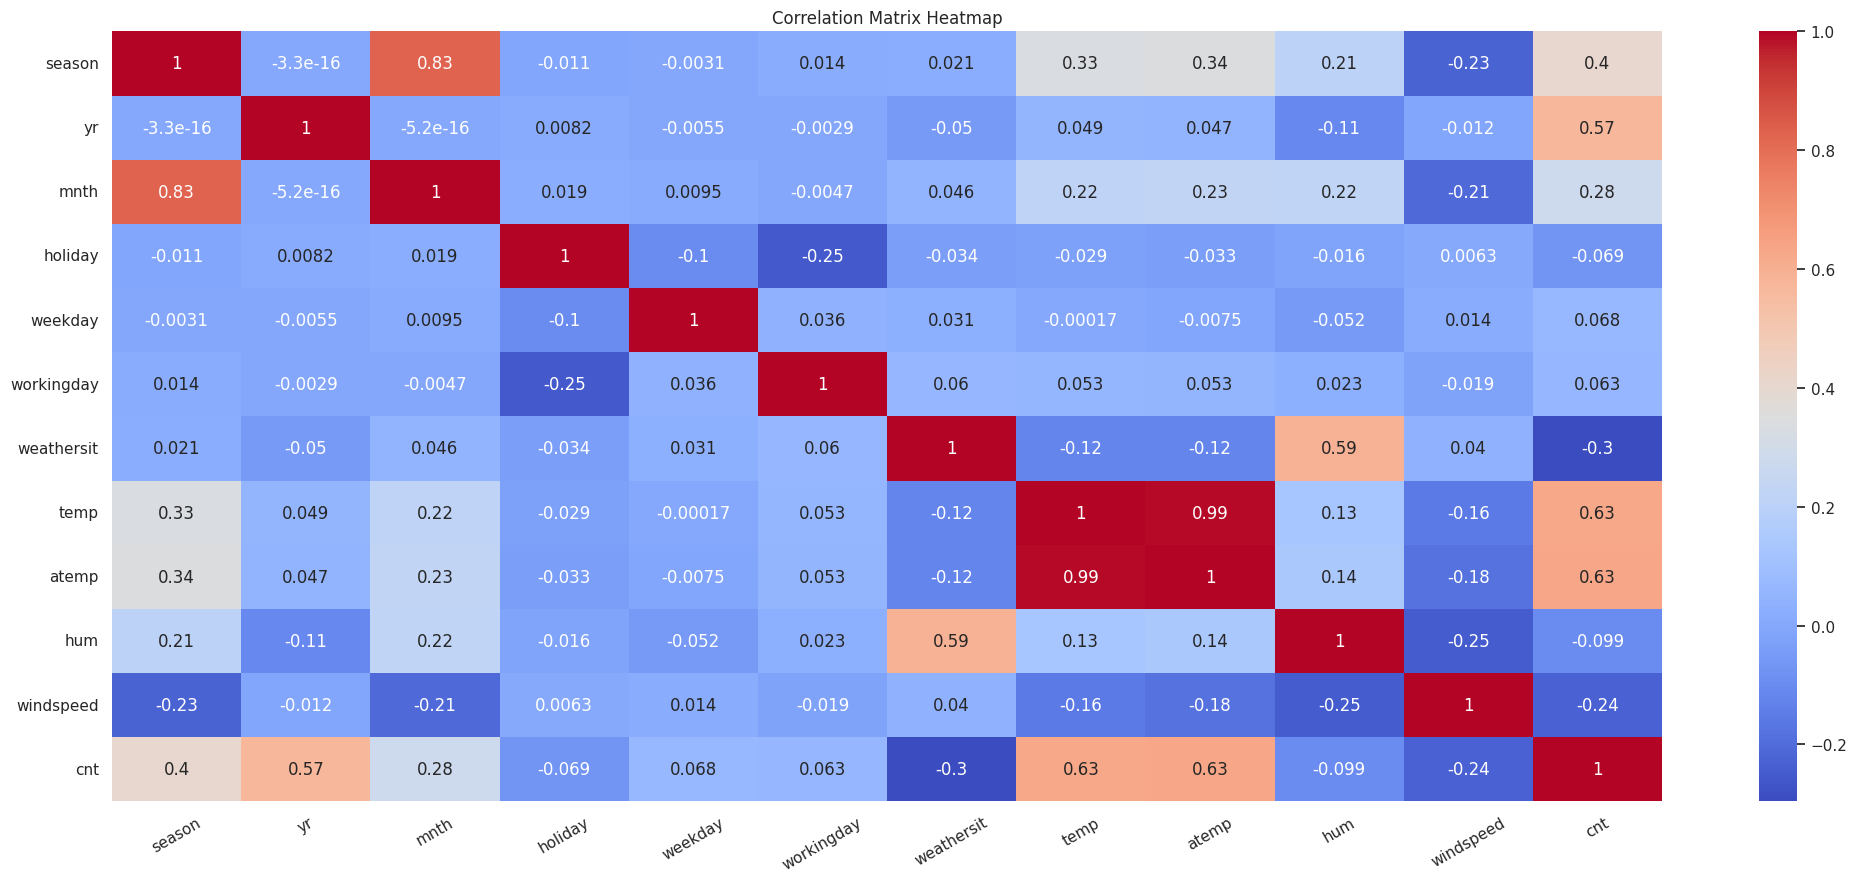

In [34]:
# Lets plot the correlation matrix(heatmap)
plt.figure(figsize=(25,10))
sns.heatmap(bike_refined_df.corr(), cmap='coolwarm', annot = True, xticklabels=True)
plt.xticks(rotation=30)  # Rotate x-axis labels by 45 degrees
plt.title('Correlation Matrix Heatmap')
plt.show()

Inferences from heatmap: 
1. Since Count is sum of casual and registed. That we can infer from  heatmap as casual and registered are highly correleted with cnt. 
2. holiday, hum, and windspeed is negatively correlated. 
3. Indepedent variable temp and atemp is highly correlated(0.99). This show that there is high possiblity that one may have derived from another,One of the them can be dropped. Will use VIP and p values to drop this.

In [35]:
bike_refined_df.shape

(730, 12)

## Dummy Variables

We will create Dummy variables for these 4 categorical variables 'mnth', 'weekday', 'season' & 'weathersit'.

Creating dummy variables for categorical data is crucial in machine learning since most algorithms require numerical input. Categorical data in columns like 'mnth', 'weekday', 'season', and 'weathersit' need to be transformed into a numerical format to avoid ordinal assumptions that could mislead the model. Dummy variables, which create binary columns for each category, ensure that no false ordinal relationship is inferred.

We will have to convert them into 'category' data types, before creating dummy variables.

Before generating these dummy variables, converting the categorical columns to the 'category' data type offers significant benefits. This conversion reduces memory usage and speeds up computations compared to keeping the data in an 'object' (string) format or numerical types(assumed categorical types). Moreover, using the 'category' data type ensures that the data is consistently treated as categorical, maintaining data integrity throughout the preprocessing steps.

In [36]:
bike_refined_df['season']=bike_refined_df['season'].astype('category')
bike_refined_df['weathersit']=bike_refined_df['weathersit'].astype('category')
bike_refined_df['mnth']=bike_refined_df['mnth'].astype('category')
bike_refined_df['weekday']=bike_refined_df['weekday'].astype('category')

In [37]:
bike_refined_df['season'].replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)
bike_refined_df['weathersit'].replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)
bike_refined_df['mnth'].replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'},inplace = True)
bike_refined_df['weekday'].replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'},inplace = True)
bike_refined_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


In [38]:
bike_refined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB



The code provided performs the following three tasks:

1. **Create Dummy Variables**: Converts categorical variables into dummy/indicator variables.
2. **Drop Original Variable**: Removes the original categorical variable after converting it to dummy variables.
3. **Drop First Dummy Variable**: Avoids the dummy variable trap by dropping the first dummy variable for each set of dummies created.

### 🌟 Explanation

Here's a step-by-step explanation with a focus on each task:

#### 1️⃣ Create Dummy Variables

**Creating dummy variables** means converting categorical variables into a series of binary (0 or 1) columns. Each unique category in the original variable becomes a new column.


#### 2️⃣ Drop Original Variable

After creating dummy variables, the original categorical variable is redundant and can be dropped. This is implicitly handled by `pd.get_dummies()` when creating dummies directly from the DataFrame.


#### 3️⃣ Drop First Dummy Variable

To avoid multicollinearity (dummy variable trap), we drop the first dummy variable of each set. This ensures that the dummy variables are not linearly dependent.

By following these steps, the original categorical variables are transformed into a format suitable for machine learning models, avoiding issues like multicollinearity.

In [39]:

# 1) Create Dummy variable
# 2) Drop original variable for which the dummy was created
# 3) Drop first dummy variable for each set of dummies created.

bike_refined_df = pd.get_dummies(bike_refined_df, drop_first=True)
bike_refined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   730 non-null    int64  
 1   holiday              730 non-null    int64  
 2   workingday           730 non-null    int64  
 3   temp                 730 non-null    float64
 4   atemp                730 non-null    float64
 5   hum                  730 non-null    float64
 6   windspeed            730 non-null    float64
 7   cnt                  730 non-null    int64  
 8   season_summer        730 non-null    bool   
 9   season_fall          730 non-null    bool   
 10  season_winter        730 non-null    bool   
 11  mnth_feb             730 non-null    bool   
 12  mnth_mar             730 non-null    bool   
 13  mnth_apr             730 non-null    bool   
 14  mnth_may             730 non-null    bool   
 15  mnth_jun             730 non-null    boo

## Splitting the bike sharing dataset

Splitting the data to Train and Test: - We will now split the data into TRAIN and TEST 

We will use train_test_split method from sklearn package for this using the ratio (70:30)

In [40]:
# Check the shape before spliting

bike_refined_df.shape


(730, 30)

#### importing `train_test_split` library from sklearn model selection package

In [41]:
# importing train_test_split library from sklearn model selection package
from sklearn.model_selection import train_test_split

In [42]:
# specified 'random_state' so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike_refined_df, train_size = 0.70, test_size = 0.30, random_state = 100)

In [43]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 653 to 79
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   510 non-null    int64  
 1   holiday              510 non-null    int64  
 2   workingday           510 non-null    int64  
 3   temp                 510 non-null    float64
 4   atemp                510 non-null    float64
 5   hum                  510 non-null    float64
 6   windspeed            510 non-null    float64
 7   cnt                  510 non-null    int64  
 8   season_summer        510 non-null    bool   
 9   season_fall          510 non-null    bool   
 10  season_winter        510 non-null    bool   
 11  mnth_feb             510 non-null    bool   
 12  mnth_mar             510 non-null    bool   
 13  mnth_apr             510 non-null    bool   
 14  mnth_may             510 non-null    bool   
 15  mnth_jun             510 non-null    bool   

In [44]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   219 non-null    int64  
 1   holiday              219 non-null    int64  
 2   workingday           219 non-null    int64  
 3   temp                 219 non-null    float64
 4   atemp                219 non-null    float64
 5   hum                  219 non-null    float64
 6   windspeed            219 non-null    float64
 7   cnt                  219 non-null    int64  
 8   season_summer        219 non-null    bool   
 9   season_fall          219 non-null    bool   
 10  season_winter        219 non-null    bool   
 11  mnth_feb             219 non-null    bool   
 12  mnth_mar             219 non-null    bool   
 13  mnth_apr             219 non-null    bool   
 14  mnth_may             219 non-null    bool   
 15  mnth_jun             219 non-null    bool   

In [45]:
df_train.shape

(510, 30)

In [46]:
df_test.shape

(219, 30)

Perform the EDA on Training (df_train) Dataset

Visualising Numeric Variables using pairplot of all the numeric variables.

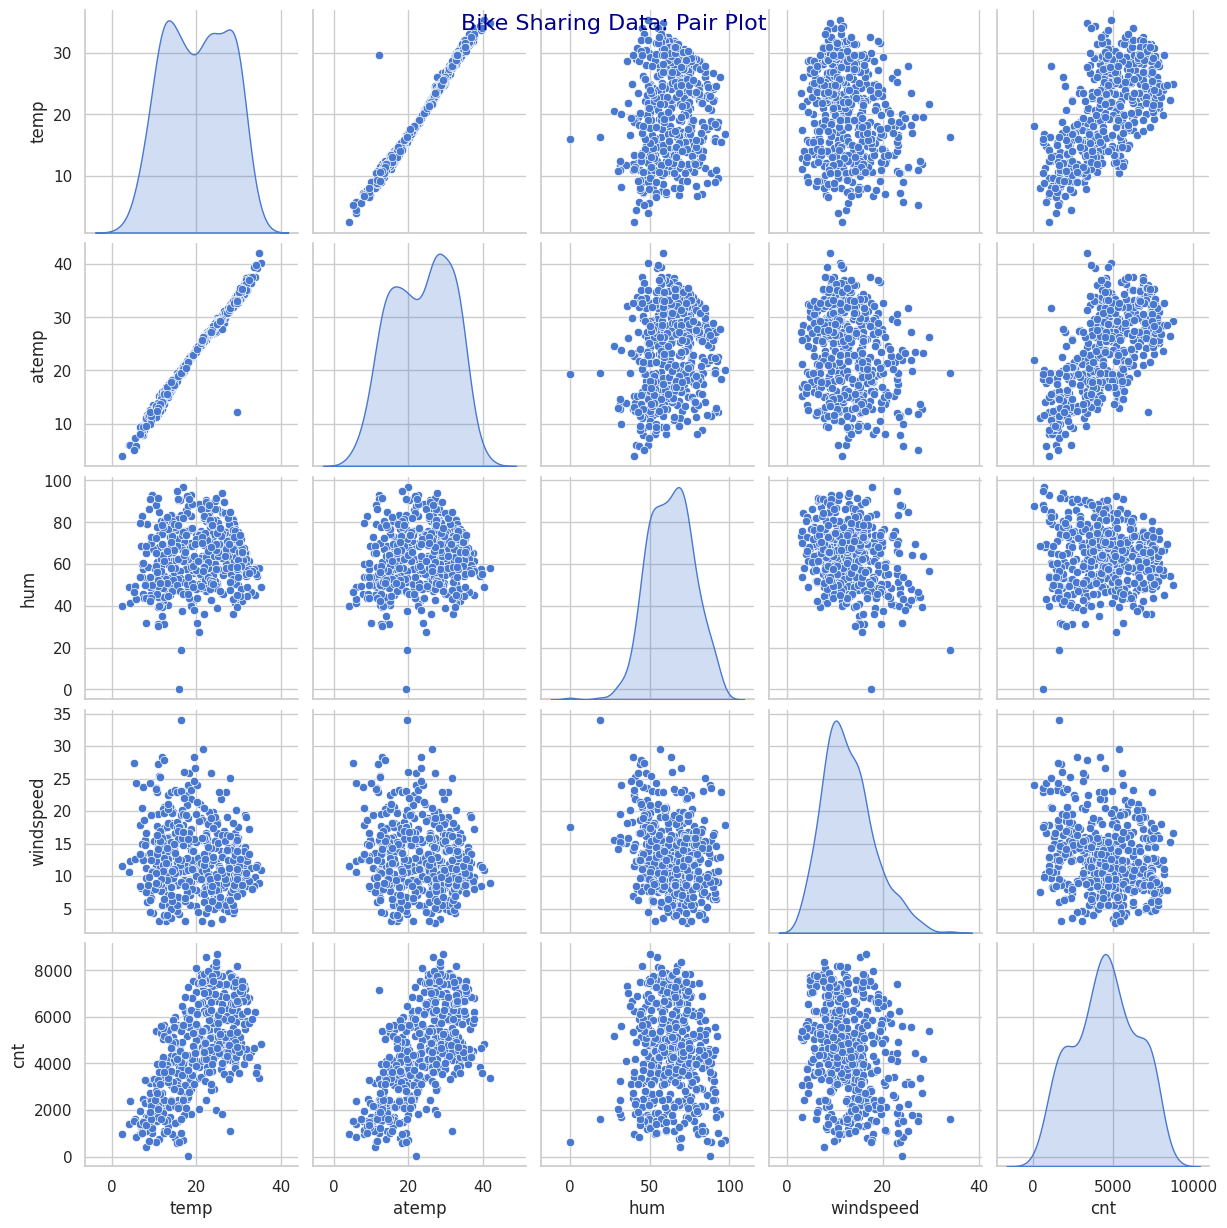

In [47]:

features = [ 'temp', 'atemp', 'hum', 'windspeed','cnt']
bike_num=df_train[features]
# Creating a pair plot with KDE on the diagonal
sns.set(style="whitegrid", palette="muted")
pair_plot = sns.pairplot(bike_num, diag_kind='kde')
# Adding titles and labels
pair_plot.fig.suptitle('Bike Sharing Data: Pair Plot', fontsize=16, color='darkblue')
plt.show()

### Observation

The above PairPlot tells us that there is likely a Linear relationship between 'temp','atemp' and 'cnt'

## Visualising Catagorical Variables

Building boxplot of all categorical variables (before creating dummies) againt the target variable 'cnt' to see how each of the predictor variable stackup against the target variable.



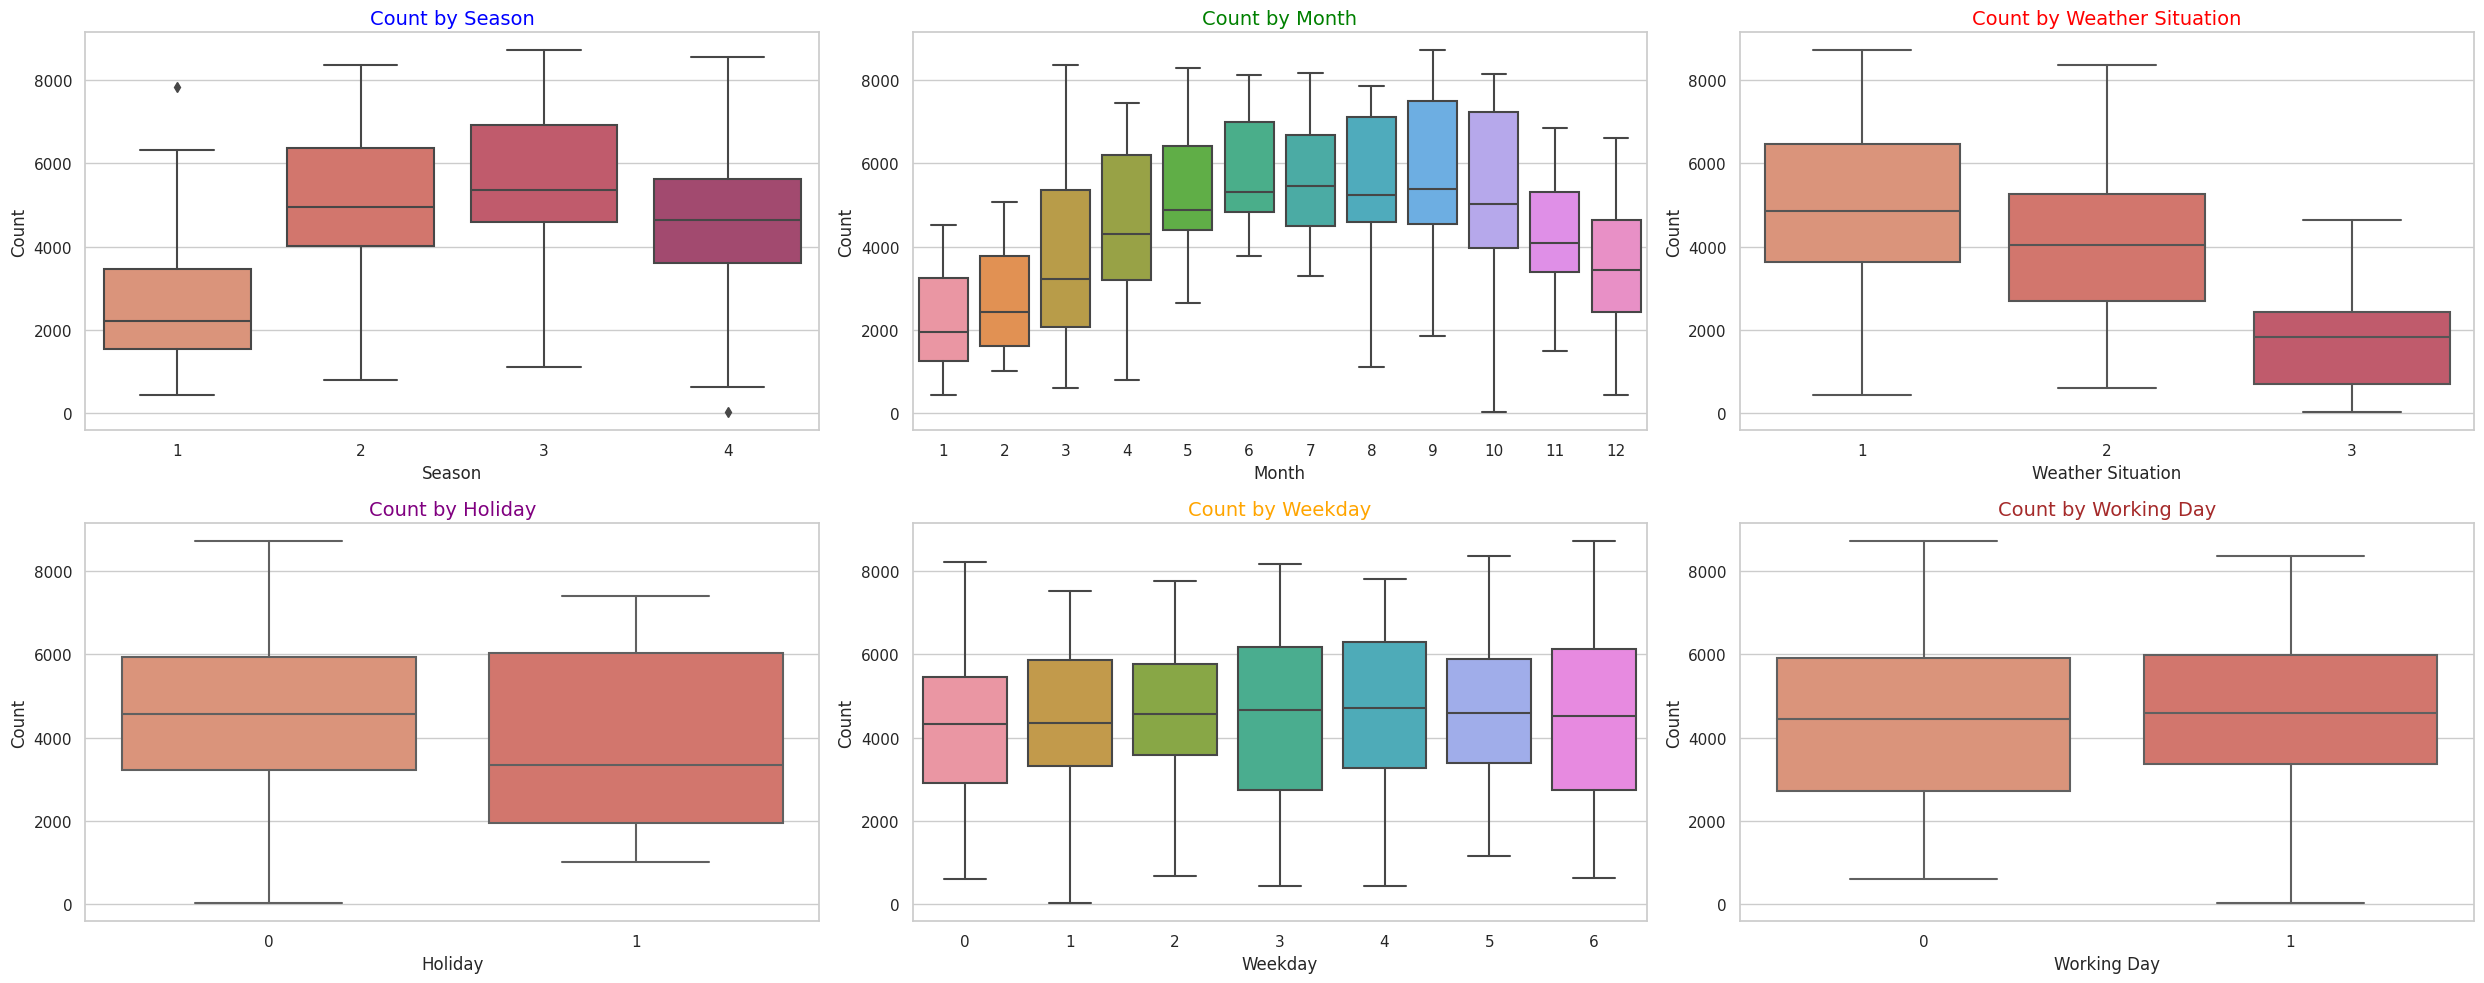

In [48]:
# Build boxplot of all categorical variables (before creating dummies) against the target variable 'cnt' using bike_df
# to see how each of the predictor variable stackup against the target variable.

# Set the color palette
sns.set_palette("flare")

# Create a figure with a specified size
plt.figure(figsize=(25, 10))

# Subplot 1: Boxplot of 'cnt' by 'season'
plt.subplot(2, 3, 1)
sns.boxplot(x='season', y='cnt', data=bike_df)
plt.title('Count by Season', fontsize=14, color='blue')
plt.xlabel('Season', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Subplot 2: Boxplot of 'cnt' by 'mnth'
plt.subplot(2, 3, 2)
sns.boxplot(x='mnth', y='cnt', data=bike_df)
plt.title('Count by Month', fontsize=14, color='green')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Subplot 3: Boxplot of 'cnt' by 'weathersit'
plt.subplot(2, 3, 3)
sns.boxplot(x='weathersit', y='cnt', data=bike_df)
plt.title('Count by Weather Situation', fontsize=14, color='red')
plt.xlabel('Weather Situation', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Subplot 4: Boxplot of 'cnt' by 'holiday'
plt.subplot(2, 3, 4)
sns.boxplot(x='holiday', y='cnt', data=bike_df)
plt.title('Count by Holiday', fontsize=14, color='purple')
plt.xlabel('Holiday', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Subplot 5: Boxplot of 'cnt' by 'weekday'
plt.subplot(2, 3, 5)
sns.boxplot(x='weekday', y='cnt', data=bike_df)
plt.title('Count by Weekday', fontsize=14, color='orange')
plt.xlabel('Weekday', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Subplot 6: Boxplot of 'cnt' by 'workingday'
plt.subplot(2, 3, 6)
sns.boxplot(x='workingday', y='cnt', data=bike_df)
plt.title('Count by Working Day', fontsize=14, color='brown')
plt.xlabel('Working Day', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

### Inference Summary 🚲

We analyzed 6 categorical variables in the dataset using a Box plot to study their effect on the dependent variable, `cnt`. Here are the key insights derived:

#### 📅 Season
- **Insight:** Season 3 accounts for approximately 32% of bike bookings with a median of over 5000 bookings over two years.
- **Comparison:** Season 2 and Season 4 follow with 27% and 25% of total bookings, respectively.
- **Conclusion:** Season is a significant predictor for bike bookings.

#### 📆 Month
- **Insight:** About 10% of bike bookings occur during months 5, 6, 7, 8, and 9, with a median of over 4000 bookings per month.
- **Conclusion:** Month shows a noticeable trend in bookings and can be a valuable predictor.

#### 🌤 Weather Situation
- **Insight:** Weather situation 1 (weathersit1) corresponds to nearly 67% of bike bookings with a median close to 5000 bookings over two years.
- **Comparison:** Weather situation 2 (weathersit2) follows with 30% of total bookings.
- **Conclusion:** Weather situation is a strong predictor of bike bookings.

#### 📅 Holiday
- **Insight:** Around 97.6% of bike bookings occur on non-holidays, indicating a clear bias.
- **Conclusion:** Holiday status is not a reliable predictor for bike bookings.

#### 📅 Weekday
- **Insight:** Bookings are relatively uniform across weekdays, ranging between 13.5% to 14.8% with medians between 4000 to 5000 bookings.
- **Conclusion:** The weekday variable may have a marginal influence, and the model should decide its inclusion.

#### 🏢 Working Day
- **Insight:** Approximately 69% of bike bookings occur on working days, with a median close to 5000 bookings over two years.
- **Conclusion:** Working day is a significant predictor for bike bookings.

### Comparison Table 🛠️

| Variable    | % of Total Bookings | Median Bookings | Predictive Strength    |
|-------------|---------------------|-----------------|------------------------|
| **Season**  | 32% (Season 3)      | >5000           | High                   |
| **Month**   | 10% (May-Sep)       | >4000           | Moderate               |
| **Weather** | 67% (weathersit1)   | ~5000           | High                   |
| **Holiday** | 97.6% (Non-holidays)| -               | Low                    |
| **Weekday** | 13.5%-14.8%         | 4000-5000       | Uncertain              |
| **Workday** | 69% (Workdays)      | ~5000           | High                   |

### Conclusion 📝

The analysis indicates that **Season**, **Month**, **Weather Situation**, and **Working Day** are strong predictors of bike bookings. **Holiday** is not a reliable predictor, and the influence of **Weekday** is uncertain, best left for the model to decide.


This approach ensures a clear understanding of each variable's impact and aids in the decision-making process for predictive modeling.

## Correlation Matrix

Let's use the correlation coefficients to see which variables are highly correlated. 

Note: here we are considering only those variables  that were chosen for analysis from bike_refined_df

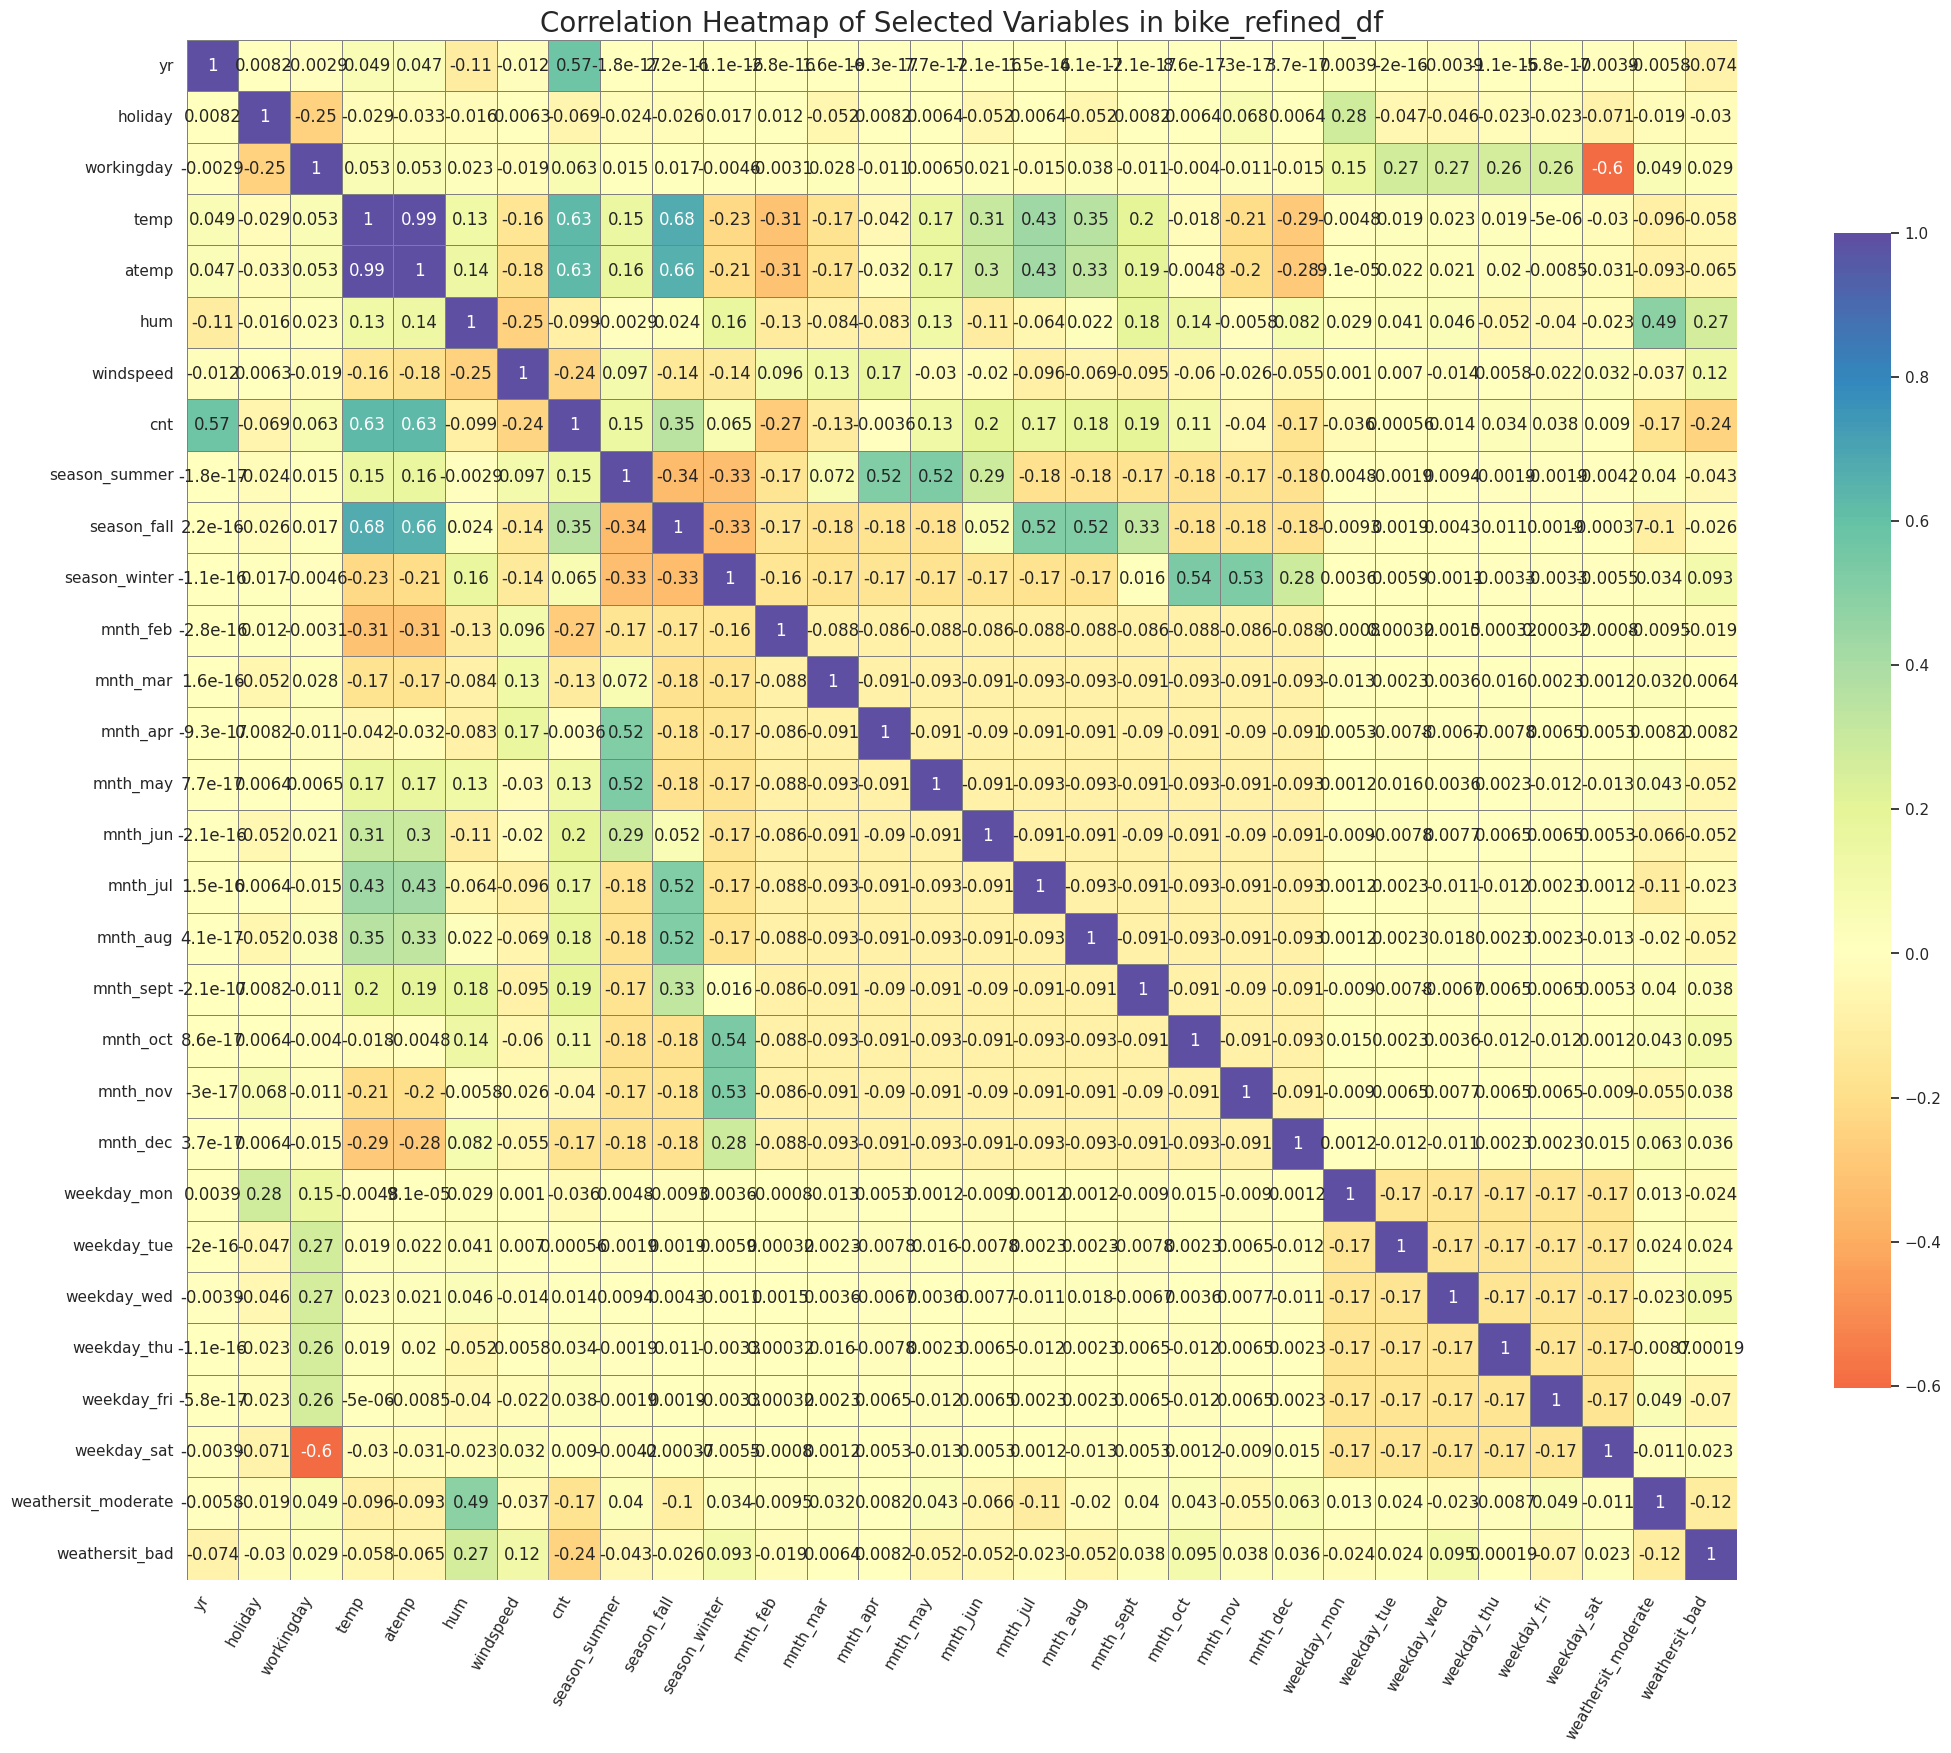

In [49]:
# 🚴‍♂️🔍 **Correlation Coefficients Analysis**
# 
# Let's check the correlation coefficients to see which variables are highly correlated. 
# Note: Here we are considering only those variables that were chosen for analysis from `bike_refined_df`.


# Set the style and color palette 🎨
sns.set(style="whitegrid", palette="muted")

# Specify the figure size 🖼️
plt.figure(figsize=(25, 20))

# Create a heatmap with annotations and a high contrast colormap 🌈
# Using the 'Spectral' colormap for better visual distinction
cmap = sns.color_palette("Spectral", as_cmap=True)
sns.heatmap(bike_refined_df.corr(), annot=True, cmap=cmap, center=0, 
            linewidths=0.5, linecolor='grey', cbar_kws={"shrink": 0.75})

# Rotate the x-axis labels 📏
plt.xticks(rotation=60, ha='right')

# Add a title 📝
plt.title('Correlation Heatmap of Selected Variables in bike_refined_df', fontsize=20)

# Display the heatmap 👀
plt.show()

### Observations

🔍 **Analyzing Collinearity by Understand a Heatmap:**
- The heatmap provides a clear visualization of multicollinear variables and highlights those with high collinearity with the target variable. 📊

🔄 **Using the Heatmap During Model Building:**
- We will frequently reference this heatmap while constructing our linear model. 🏗️
- By cross-checking correlated values with the heatmap, along with evaluating **Variance Inflation Factor (VIF)** and **p-values**, we can accurately determine which variables to include or exclude from our model. ✅❌

### Process Overview

Let's illustrate the process with a step-by-step approach:

1. **Visualizing Collinearity:**
    - Use a heatmap to display the correlation matrix of all variables.
    - Identify variables that are highly correlated with each other and with the target variable.

2. **Building the Linear Model:**
    - Refer to the heatmap to validate correlated values.
    - Calculate the VIF to assess the multicollinearity of each variable.
    - Evaluate p-values to check the significance of each variable.

3. **Variable Selection:**
    - Use the combined insights from the heatmap, VIF, and p-values.
    - Select or eliminate variables to refine the model.


### Key Points

| Aspect                 | Description                                            |
|------------------------|--------------------------------------------------------|
| **Heatmap**            | Visualizes multicollinearity between variables.        |
| **VIF**                | Measures the multicollinearity of each variable.       |
| **p-value**            | Determines the significance of each variable.          |
| **Variable Selection** | Combines heatmap, VIF, and p-values for optimal choice.|


Using this structured approach ensures a robust and interpretable linear model. 🌟

Bivariate analysis

Barcharts for categorical variables to see demands

## SCALING THE FEATURES



In [50]:
from sklearn.preprocessing import MinMaxScaler

In [51]:
scaler = MinMaxScaler()

scaler: This is an instance of a scaler object, likely from a library such as scikit-learn (sklearn.preprocessing.MinMaxScaler, for example). Scaling is a common preprocessing step in machine learning workflows, where you normalize the features to a similar scale to improve the performance of models, especially those sensitive to the scale of input features.

In [52]:
# Checking the columns before scaling
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_summer', 'season_fall', 'season_winter', 'mnth_feb',
       'mnth_mar', 'mnth_apr', 'mnth_may', 'mnth_jun', 'mnth_jul', 'mnth_aug',
       'mnth_sept', 'mnth_oct', 'mnth_nov', 'mnth_dec', 'weekday_mon',
       'weekday_tue', 'weekday_wed', 'weekday_thu', 'weekday_fri',
       'weekday_sat', 'weathersit_moderate', 'weathersit_bad'],
      dtype='object')

In [53]:
# Checking the values before scaling
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,...,mnth_nov,mnth_dec,weekday_mon,weekday_tue,weekday_wed,weekday_thu,weekday_fri,weekday_sat,weathersit_moderate,weathersit_bad
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,False,False,...,False,False,False,True,False,False,False,False,False,False
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,False,True,...,False,False,False,True,False,False,False,False,False,False
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,False,False,...,False,False,False,False,False,False,False,True,True,False
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,False,False,...,False,True,False,False,False,False,False,False,False,False
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,True,False,...,False,False,False,False,False,False,False,True,True,False


### Apply scaler() to all the numeric variables

In [54]:
# the names of the numeric variables/columns that you want to scale
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

LINEAR MODEL BUILDING

Dividing into X and Y sets for the model building

In [55]:
y_train = df_train.pop('cnt')
X_train = df_train

RFE
Recursive feature elimination: We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [56]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [57]:
# Running RFE with the output number of the variable equal to 15
LR = LinearRegression()
estimator = LR.fit(X_train, y_train)

In [58]:
rfe = RFE(estimator, n_features_to_select=15)   # running RFE
rfe = rfe.fit(X_train, y_train)

In [59]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 10),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_summer', True, 1),
 ('season_fall', False, 13),
 ('season_winter', True, 1),
 ('mnth_feb', False, 11),
 ('mnth_mar', False, 6),
 ('mnth_apr', False, 8),
 ('mnth_may', False, 7),
 ('mnth_jun', False, 9),
 ('mnth_jul', False, 15),
 ('mnth_aug', True, 1),
 ('mnth_sept', True, 1),
 ('mnth_oct', False, 5),
 ('mnth_nov', False, 12),
 ('mnth_dec', False, 14),
 ('weekday_mon', True, 1),
 ('weekday_tue', True, 1),
 ('weekday_wed', False, 2),
 ('weekday_thu', True, 1),
 ('weekday_fri', False, 3),
 ('weekday_sat', False, 4),
 ('weathersit_moderate', True, 1),
 ('weathersit_bad', True, 1)]

### listing recommended columns

In [60]:
# listing recommended columns
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_summer', 'season_winter', 'mnth_aug', 'mnth_sept',
       'weekday_mon', 'weekday_tue', 'weekday_thu', 'weathersit_moderate',
       'weathersit_bad'],
      dtype='object')

### listing ignored columns

In [61]:
# listing ignored columns
X_train.columns[~rfe.support_]

Index(['atemp', 'season_fall', 'mnth_feb', 'mnth_mar', 'mnth_apr', 'mnth_may',
       'mnth_jun', 'mnth_jul', 'mnth_oct', 'mnth_nov', 'mnth_dec',
       'weekday_wed', 'weekday_fri', 'weekday_sat'],
      dtype='object')

In [62]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]


In [63]:
# Ensure X_train_rfe is a DataFrame with no NaN and all numeric values
X_train_rfe = X_train_rfe.apply(pd.to_numeric, errors='coerce')  # Convert all columns to numeric
X_train_rfe = X_train_rfe.dropna()  # Drop rows with NaN values

In [64]:
# Convert boolean columns to numeric
bool_cols = X_train_rfe.select_dtypes(include=['bool']).columns
X_train_rfe[bool_cols] = X_train_rfe[bool_cols].astype(int)

## using 'STATS MODEL' let us iteratively build models

Model 1

In [65]:
X_train_rfe1 = X_train_rfe.copy()

In [66]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [67]:
# util to calculate VIF given training df
def compute_VIF(train_df):
    
    # Check for non-numeric columns
    if not all(train_df.dtypes.apply(lambda x: np.issubdtype(x, np.number))):
        raise ValueError("All columns in train_df must be numeric.")
    
    # Handle missing values
    if train_df.isnull().values.any():
        raise ValueError("train_df contains NaN values. Handle them before proceeding.")
        
        
    # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
    vif = pd.DataFrame()
    vif['Features'] = train_df.columns
    vif['VIF'] = [variance_inflation_factor(train_df.values, i) for i in range(train_df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [68]:
compute_VIF(X_train_rfe1)

,Features,VIF
4,hum,15.40
3,temp,9.74
2,workingday,4.50
5,windspeed,3.63
13,weathersit_moderate,2.14
0,yr,2.03
6,season_summer,1.82
7,season_winter,1.75
10,weekday_mon,1.64
8,mnth_aug,1.59


In [69]:
import statsmodels.api as sm

In [70]:
def fit_OLS_model(y_train, X_train_rfe):

    # Add a constant
    X_train_lm = sm.add_constant(X_train_rfe)

    # Create a first fitted model
    lr = sm.OLS(y_train, X_train_lm).fit()
    
    return lr

In [71]:
lr1 = fit_OLS_model(y_train,X_train_rfe1)
# coefficients of the features
lr1.params

const                  0.218601
yr                     0.228675
holiday               -0.071081
workingday             0.023767
temp                   0.538365
hum                   -0.172821
windspeed             -0.180846
season_summer          0.102713
season_winter          0.149367
mnth_aug               0.054725
mnth_sept              0.121077
weekday_mon           -0.016698
weekday_tue           -0.014916
weekday_thu           -0.007040
weathersit_moderate   -0.055791
weathersit_bad        -0.238460
dtype: float64

In [72]:
# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     177.0
Date:                Sun, 26 May 2024   Prob (F-statistic):          1.38e-187
Time:                        08:06:30   Log-Likelihood:                 510.86
No. Observations:                 510   AIC:                            -989.7
Df Residuals:                     494   BIC:                            -922.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2186    

Model 2

Removing the variable 'hum' based on its High VIF

In [73]:
X_train_rfe2 = X_train_rfe1.drop(["hum"], axis = 1)
compute_VIF(X_train_rfe2)

,Features,VIF
3,temp,5.68
2,workingday,4.30
4,windspeed,3.25
0,yr,2.02
5,season_summer,1.81
9,weekday_mon,1.64
7,mnth_aug,1.58
12,weathersit_moderate,1.52
6,season_winter,1.50
11,weekday_thu,1.48


In [74]:
lr2 = fit_OLS_model(y_train,X_train_rfe2)
lr2.params


const                  0.119507
yr                     0.232593
holiday               -0.070347
workingday             0.024895
temp                   0.516621
windspeed             -0.147642
season_summer          0.099816
season_winter          0.139757
mnth_aug               0.053516
mnth_sept              0.115010
weekday_mon           -0.019001
weekday_tue           -0.016435
weekday_thu           -0.006378
weathersit_moderate   -0.083454
weathersit_bad        -0.285551
dtype: float64

In [75]:
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     180.7
Date:                Sun, 26 May 2024   Prob (F-statistic):          3.18e-184
Time:                        08:06:31   Log-Likelihood:                 500.11
No. Observations:                 510   AIC:                            -970.2
Df Residuals:                     495   BIC:                            -906.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1195    

Removing `hum` due to high VIF

In [76]:
X_train_rfe3 = X_train_rfe2.drop(["weekday_thu"], axis = 1)
compute_VIF(X_train_rfe3)


,Features,VIF
3,temp,5.68
2,workingday,3.52
4,windspeed,3.25
0,yr,2.02
5,season_summer,1.81
7,mnth_aug,1.58
11,weathersit_moderate,1.51
6,season_winter,1.50
9,weekday_mon,1.46
10,weekday_tue,1.32


In [77]:
lr3 = fit_OLS_model(y_train,X_train_rfe3)
lr3.params

const                  0.119371
yr                     0.232583
holiday               -0.072876
workingday             0.022862
temp                   0.516795
windspeed             -0.147731
season_summer          0.099875
season_winter          0.139719
mnth_aug               0.053475
mnth_sept              0.114867
weekday_mon           -0.016911
weekday_tue           -0.014420
weathersit_moderate   -0.083169
weathersit_bad        -0.285627
dtype: float64

In [78]:
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     194.9
Date:                Sun, 26 May 2024   Prob (F-statistic):          2.49e-185
Time:                        08:06:32   Log-Likelihood:                 500.00
No. Observations:                 510   AIC:                            -972.0
Df Residuals:                     496   BIC:                            -912.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1194    

In [79]:
X_train_rfe4 = X_train_rfe3.drop(["weekday_tue"], axis = 1)

In [80]:
compute_VIF(X_train_rfe4)

,Features,VIF
3,temp,5.67
4,windspeed,3.25
2,workingday,3.15
0,yr,2.02
5,season_summer,1.81
7,mnth_aug,1.58
10,weathersit_moderate,1.51
6,season_winter,1.50
9,weekday_mon,1.38
8,mnth_sept,1.31


In [81]:
lr4 = fit_OLS_model(y_train,X_train_rfe4)
lr4.params

const                  0.119925
yr                     0.232602
holiday               -0.075459
workingday             0.019393
temp                   0.515957
windspeed             -0.148135
season_summer          0.099793
season_winter          0.139391
mnth_aug               0.053733
mnth_sept              0.115286
weekday_mon           -0.013565
weathersit_moderate   -0.083066
weathersit_bad        -0.284346
dtype: float64

In [82]:
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.0
Date:                Sun, 26 May 2024   Prob (F-statistic):          3.12e-186
Time:                        08:06:33   Log-Likelihood:                 499.36
No. Observations:                 510   AIC:                            -972.7
Df Residuals:                     497   BIC:                            -917.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1199    

In [83]:
X_train_rfe5 = X_train_rfe4.drop(["weekday_mon"], axis = 1)
compute_VIF(X_train_rfe5)

,Features,VIF
3,temp,5.67
4,windspeed,3.25
2,workingday,2.92
0,yr,2.01
5,season_summer,1.81
7,mnth_aug,1.58
9,weathersit_moderate,1.51
6,season_winter,1.50
8,mnth_sept,1.31
10,weathersit_bad,1.08


In [84]:
lr5 = fit_OLS_model(y_train,X_train_rfe5)
lr5.params


const                  0.120040
yr                     0.232081
holiday               -0.085888
workingday             0.016749
temp                   0.516450
windspeed             -0.148001
season_summer          0.099541
season_winter          0.138997
mnth_aug               0.053801
mnth_sept              0.115566
weathersit_moderate   -0.083133
weathersit_bad        -0.284245
dtype: float64

In [85]:
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.9
Date:                Sun, 26 May 2024   Prob (F-statistic):          3.68e-187
Time:                        08:06:33   Log-Likelihood:                 498.74
No. Observations:                 510   AIC:                            -973.5
Df Residuals:                     498   BIC:                            -922.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1200    

In [86]:
X_train_rfe6 = X_train_rfe5.drop(["workingday"], axis = 1)
compute_VIF(X_train_rfe6)

,Features,VIF
2,temp,5.01
3,windspeed,3.10
0,yr,2.00
4,season_summer,1.81
6,mnth_aug,1.58
5,season_winter,1.49
8,weathersit_moderate,1.48
7,mnth_sept,1.31
9,weathersit_bad,1.08
1,holiday,1.04


In [87]:
lr6 = fit_OLS_model(y_train,X_train_rfe6)
lr6.params

const                  0.131241
yr                     0.232489
holiday               -0.097109
temp                   0.517361
windspeed             -0.149737
season_summer          0.099972
season_winter          0.138343
mnth_aug               0.054165
mnth_sept              0.116177
weathersit_moderate   -0.082534
weathersit_bad        -0.282834
dtype: float64

In [88]:
print(lr6.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     251.3
Date:                Sun, 26 May 2024   Prob (F-statistic):          1.26e-187
Time:                        08:06:34   Log-Likelihood:                 496.97
No. Observations:                 510   AIC:                            -971.9
Df Residuals:                     499   BIC:                            -925.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1312    

From the above  Model Summary Report we can say that all the p-values of respective features are less than 0.05.
Note: It is a hurestic approach that, if VIF value of any predictor is between 5 & 10, it is recommended to scrutinize such variable from business perspective and analyse any outliers & drop such feature if VIF is greater than 10
So we can now fix this 

In [89]:
X_train_lm6 = sm.add_constant(X_train_rfe6)


In [90]:
# Lets perform Residual Analysis
y_train_pred = lr6.predict(X_train_lm6)
residual = y_train_pred - y_train

### 1. Assumption of Normally Distributed Error Term

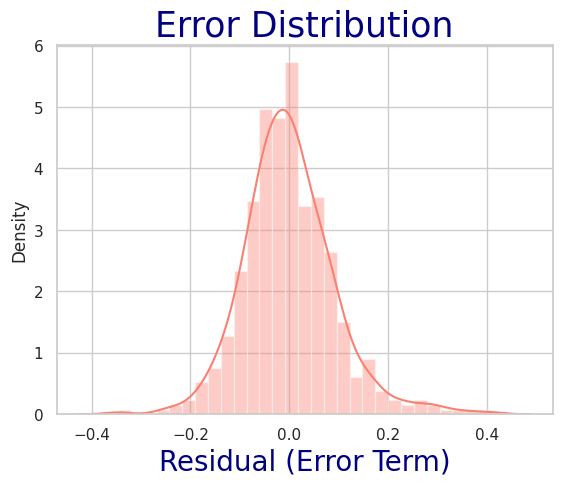

In [91]:
#1. Assumption of Normally Distributed Error Term

# Plot the histogram of the error terms
sns.distplot(residual, color='salmon')
plt.xlabel('Residual (Error Term)', fontdict={'fontsize': 20, 'color': 'navy'})
plt.title('Error Distribution', fontdict={'fontsize': 25, 'color': 'navy'})
plt.show()

### Inferences: 
From the above graph it is evident that Error Distribution Is Normallly Distributed Across 0, which indicates that our model has handled the assumption of Error Normal Distribution properly.


### Assumption of Error Terms Being Independent

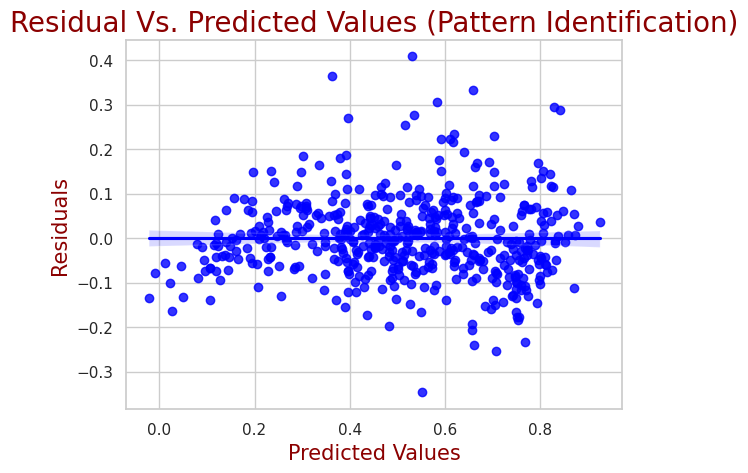

In [92]:
# Plot Residual vs. Predicted Values
sns.regplot(x=y_train_pred, y=residual, color='blue')
plt.title('Residual Vs. Predicted Values (Pattern Identification)', fontdict={'fontsize': 20, 'color': 'darkred'})
plt.xlabel('Predicted Values', fontdict={'fontsize': 15, 'color': 'darkred'})
plt.ylabel('Residuals', fontdict={'fontsize': 15, 'color': 'darkred'})
plt.show()

### Inference:
    
From the above graph, we see that there is almost no relation between Residual & Predicted Value

### 3. Homoscedasticity


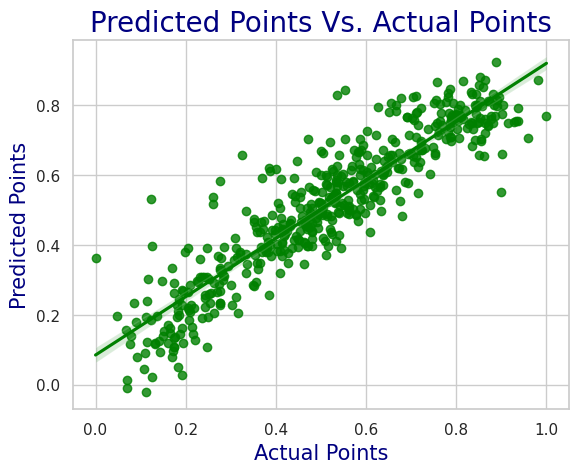

In [93]:
# Plot Predicted Points vs. Actual Points
sns.regplot(x=y_train, y=y_train_pred, color='green')
plt.title('Predicted Points Vs. Actual Points', fontdict={'fontsize': 20, 'color': 'navy'})
plt.xlabel('Actual Points', fontdict={'fontsize': 15, 'color': 'navy'})
plt.ylabel('Predicted Points', fontdict={'fontsize': 15, 'color': 'navy'})
plt.show()

we can see that variance is  similar from both end of fitted line.

### Multicorrelation

In [94]:

compute_VIF(X_train_rfe6)

,Features,VIF
2,temp,5.01
3,windspeed,3.10
0,yr,2.00
4,season_summer,1.81
6,mnth_aug,1.58
5,season_winter,1.49
8,weathersit_moderate,1.48
7,mnth_sept,1.31
9,weathersit_bad,1.08
1,holiday,1.04


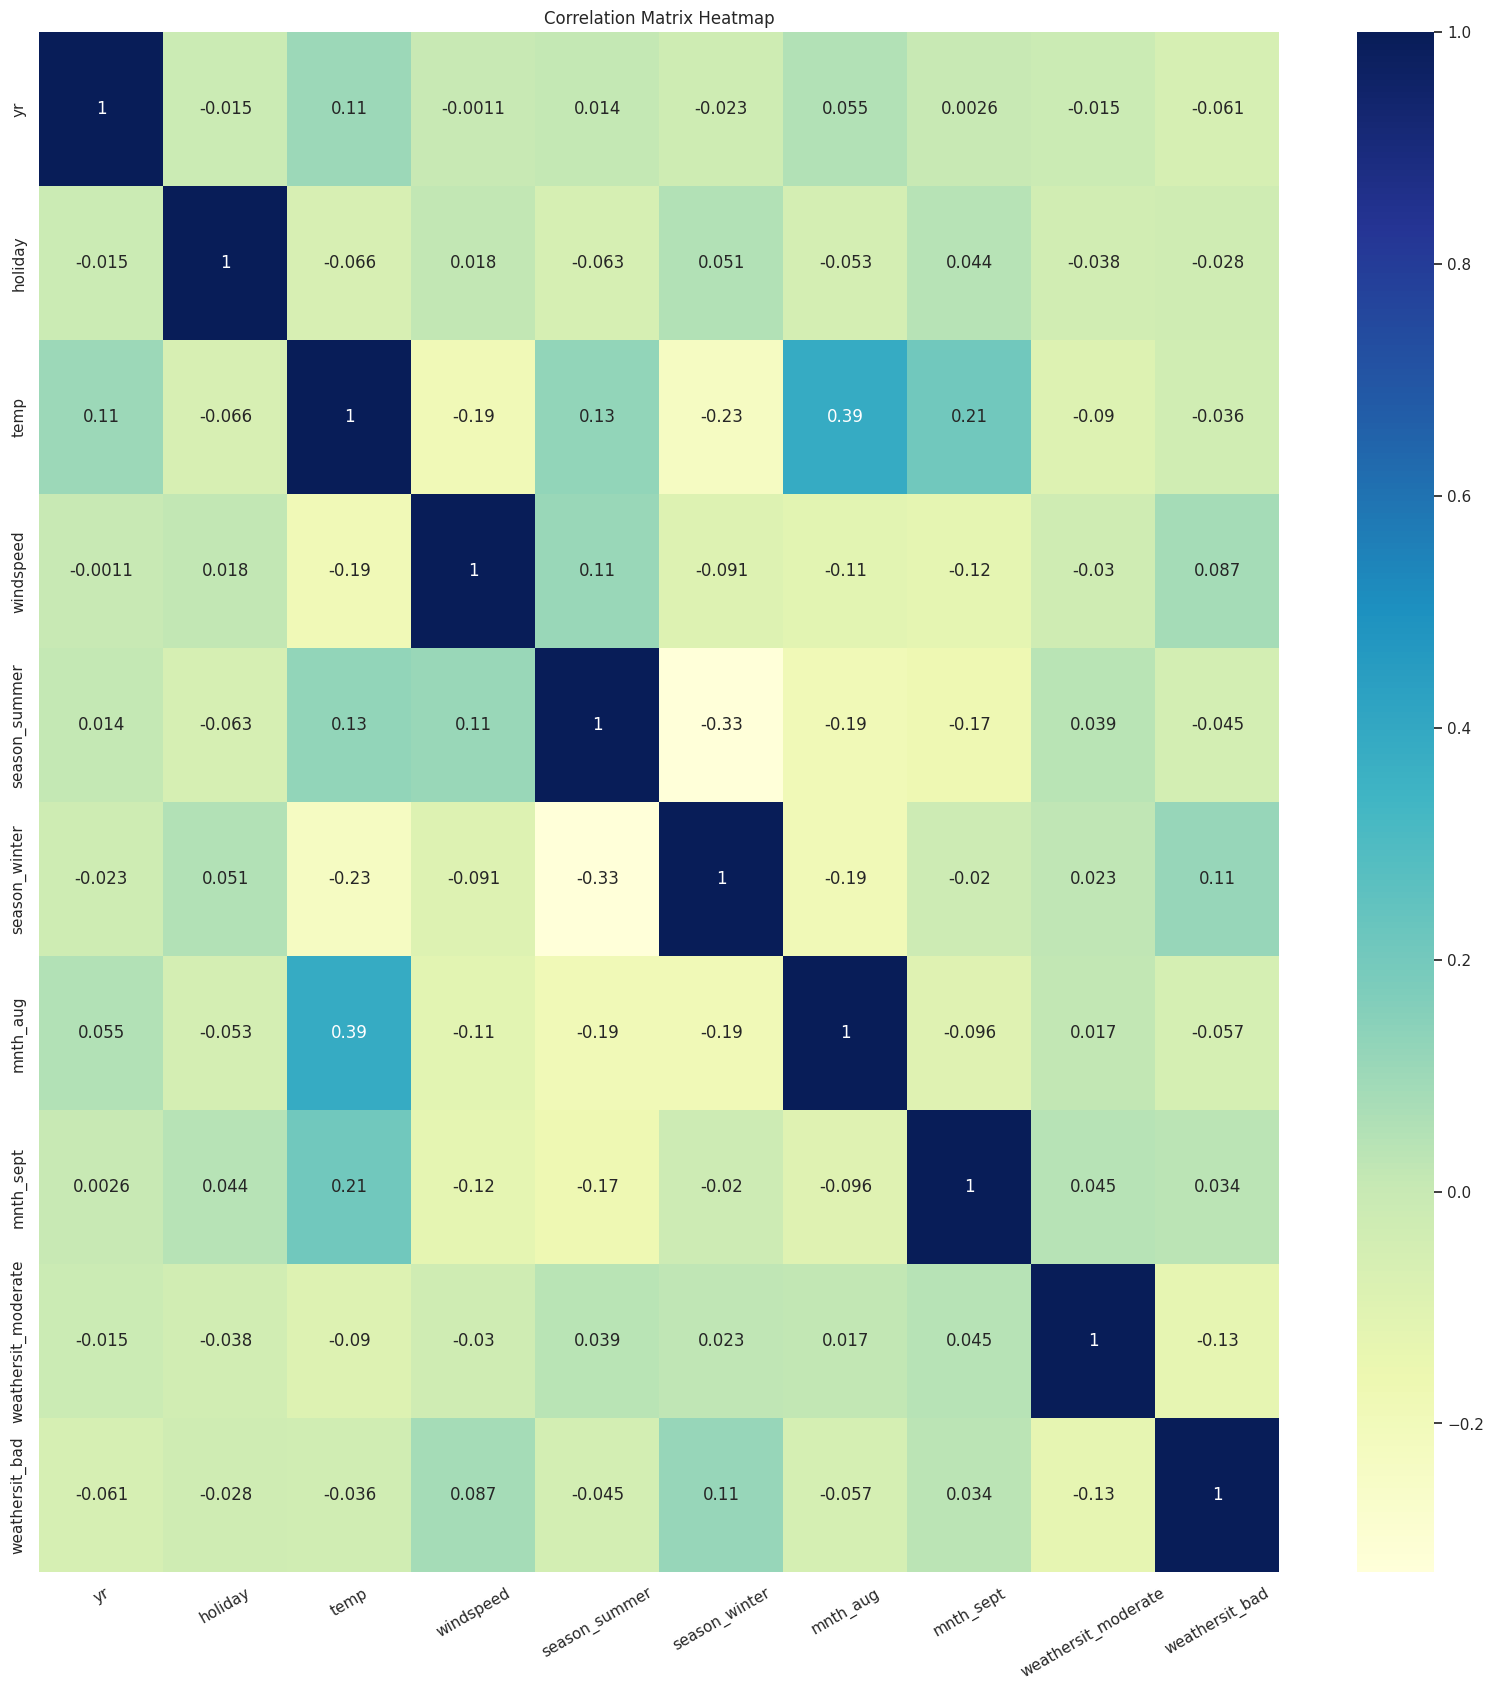

In [95]:
plt.figure(figsize = (20, 20))
# Heatmap
sns.heatmap(X_train_rfe6.corr(), cmap="YlGnBu", annot=True, xticklabels=True)
plt.xticks(rotation=30)  # Rotate x-axis labels by 45 degrees
plt.title('Correlation Matrix Heatmap')
plt.show()

As per above analysis we didn't found multi-colinearity among independedt variables

Prediction on Test Data using final Model

In [96]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [97]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,...,mnth_nov,mnth_dec,weekday_mon,weekday_tue,weekday_wed,weekday_thu,weekday_fri,weekday_sat,weathersit_moderate,weathersit_bad
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,False,True,...,False,False,True,False,False,False,False,False,True,False
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,True,False,...,False,False,False,False,True,False,False,False,False,False
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,False,False,...,False,False,False,False,False,True,False,False,True,False
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,False,True,...,False,False,False,False,True,False,False,False,False,False
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,True,False,...,False,False,False,False,False,True,False,False,False,False


In [98]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300


In [99]:
# divie into x and y
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   219 non-null    int64  
 1   holiday              219 non-null    int64  
 2   workingday           219 non-null    int64  
 3   temp                 219 non-null    float64
 4   atemp                219 non-null    float64
 5   hum                  219 non-null    float64
 6   windspeed            219 non-null    float64
 7   season_summer        219 non-null    bool   
 8   season_fall          219 non-null    bool   
 9   season_winter        219 non-null    bool   
 10  mnth_feb             219 non-null    bool   
 11  mnth_mar             219 non-null    bool   
 12  mnth_apr             219 non-null    bool   
 13  mnth_may             219 non-null    bool   
 14  mnth_jun             219 non-null    bool   
 15  mnth_jul             219 non-null    bool   

In [100]:
X_test=X_test[X_train_rfe6.columns]
# Adding constant variable to test dataframe
X_test_lr6 = sm.add_constant(X_test)
X_test_lr6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   const                219 non-null    float64
 1   yr                   219 non-null    int64  
 2   holiday              219 non-null    int64  
 3   temp                 219 non-null    float64
 4   windspeed            219 non-null    float64
 5   season_summer        219 non-null    bool   
 6   season_winter        219 non-null    bool   
 7   mnth_aug             219 non-null    bool   
 8   mnth_sept            219 non-null    bool   
 9   weathersit_moderate  219 non-null    bool   
 10  weathersit_bad       219 non-null    bool   
dtypes: bool(6), float64(3), int64(2)
memory usage: 11.5 KB


In [101]:
 lr6.params

const                  0.131241
yr                     0.232489
holiday               -0.097109
temp                   0.517361
windspeed             -0.149737
season_summer          0.099972
season_winter          0.138343
mnth_aug               0.054165
mnth_sept              0.116177
weathersit_moderate   -0.082534
weathersit_bad        -0.282834
dtype: float64

In [102]:
y_test_pred = lr6.predict(X_test_lr6)

### Calculating the metrics

R2 Score

In [103]:
from sklearn.metrics import r2_score
test_r2=r2_score(y_test, y_test_pred)
test_r2

0.7931434526028904

In [104]:
train_r2=0.834
train_adjusted_r2=0.831

In [105]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

test_adjusted_r2 = 1-(1-test_r2)*(n-1)/(n-p-1)
test_adjusted_r2


0.7831984262857217

## Final Results

### Train R-square=0.834
### Test R-square=0.793
### Train Adj-R-square=0.831
### Test Adj-R-square=0.783
### The above seems to be a very good model.